In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

In [2]:
df = pd.read_excel('Iranian_students_population.xlsx')   # خواندن فابل اکسل آمار جمعبتی دانش آموزان ایرانی
df

,Unnamed: 0,SEX,1347-1348,1348-1349,1349-1350,1350-1351,1351-1352,1352-1353,1353-1354,1354-1355,...,1385-1386,1386-1387,1387-1388,1388-1389,1389-1390,1390-1391,1391-1392,1392-1393,1393-1394,1394-1395
0,sum,M,2314030,2481384,2587829,2705357,2866839,3103607,3479299,3799188,...,7269371,7006531,6797562,6547661,6431031,6425873,6548746,6664341,6751167,6891232
1,NaN,F,1259130,1375874,1477836,1567185,1688263,1799113,2074053,2327935,...,6746020,6508436,6301075,6048254,5949995,5936776,6152174,6245197,6351048,6504307
2,Preschool,M,10680,10966,10602,11728,11748,22400,42280,95446,...,268349,247983,219653,221844,225305,232630,232028,271658,337615,349748
3,NaN,F,8782,9248,8706,9509,10025,18587,40574,79978,...,284583,263246,236191,230414,239148,242765,226989,260266,323824,338704
4,Pprimary,M,1760433,1846935,1874746,1734310,1825407,1957533,2173074,2321089,...,3009561,2952075,2912264,2878290,2898799,2932282,3522913,3610900,3701398,3819488
5,NaN,F,992699,1069331,1128112,1069331,1137189,1180938,1348350,1491431,...,2818290,2773554,2742705,2713462,2734026,2769239,3328079,3407385,3492795,3603017
6,junior_school,M,0,0,0,161754,361084,576045,739710,824242,...,2100894,1967906,1833240,1733942,1705332,1693270,1110458,1085222,1068474,1591299
7,NaN,F,0,0,0,97464,210381,330293,411746,459419,...,1837767,1740364,1644404,1558304,1539569,1535135,1002417,985951,979158,1463060
8,High_school,M,542917,623483,702481,797565,668600,547629,524235,558411,...,1890567,1838567,1832405,1713585,1601595,1567691,1683347,1696561,1643680,1130697
9,NaN,F,257649,297295,341018,390881,330668,269295,273383,297107,...,1805380,1731272,1677775,1546074,1437252,1389637,1594689,1591595,1555271,1099526


In [3]:
df.columns = ['grade', 'sex', '1347-1348', '1348-1349', '1349-1350',
       '1350-1351', '1351-1352', '1352-1353', '1353-1354', '1354-1355',
       '1355-1356', '1356-1357', '1357-1358', '1358-1359', '1359-1360',
       '1360-1361', '1361-1362', '1362-1363', '1363-1364', '1364-1365',
       '1365-1366', '1366-1367', '1367-1368', '1368-1369', '1369-1370',
       '1370-1371', '1371-1372', '1372-1373', '1373-1374', '1374-1375',
       '1375-1376', '1376-1377', '1377-1378', '1378-1379', '1379-1380',
       '1380-1381', '1381-1382','1382-1383', '1383-1384', '1384-1385',
       '1385-1386', '1386-1387', '1387-1388', '1388-1389', '1389-1390',
       '1390-1391', '1391-1392', '1392-1393', '1393-1394', '1394-1395']    # اصلاح نام ستون‌ها و تبدیل آنها به رشته‌های استاندارد

In [4]:
df.columns

Index(['grade', 'sex', '1347-1348', '1348-1349', '1349-1350', '1350-1351',
       '1351-1352', '1352-1353', '1353-1354', '1354-1355', '1355-1356',
       '1356-1357', '1357-1358', '1358-1359', '1359-1360', '1360-1361',
       '1361-1362', '1362-1363', '1363-1364', '1364-1365', '1365-1366',
       '1366-1367', '1367-1368', '1368-1369', '1369-1370', '1370-1371',
       '1371-1372', '1372-1373', '1373-1374', '1374-1375', '1375-1376',
       '1376-1377', '1377-1378', '1378-1379', '1379-1380', '1380-1381',
       '1381-1382', '1382-1383', '1383-1384', '1384-1385', '1385-1386',
       '1386-1387', '1387-1388', '1388-1389', '1389-1390', '1390-1391',
       '1391-1392', '1392-1393', '1393-1394', '1394-1395'],
      dtype='object')

In [5]:
df.drop(['1347-1348', '1348-1349', '1349-1350'], axis = 1, inplace = True)
# حذف سه سال اول تحصیلی به دلیل ایجاد اختلال در محاسبات آماری

In [6]:
df

,grade,sex,1350-1351,1351-1352,1352-1353,1353-1354,1354-1355,1355-1356,1356-1357,1357-1358,...,1385-1386,1386-1387,1387-1388,1388-1389,1389-1390,1390-1391,1391-1392,1392-1393,1393-1394,1394-1395
0,sum,M,2705357,2866839,3103607,3479299,3799188,4057944,4260956,4431123,...,7269371,7006531,6797562,6547661,6431031,6425873,6548746,6664341,6751167,6891232
1,NaN,F,1567185,1688263,1799113,2074053,2327935,2542898,2724213,2846168,...,6746020,6508436,6301075,6048254,5949995,5936776,6152174,6245197,6351048,6504307
2,Preschool,M,11728,11748,22400,42280,95446,114435,126838,139835,...,268349,247983,219653,221844,225305,232630,232028,271658,337615,349748
3,NaN,F,9509,10025,18587,40574,79978,97434,108298,119662,...,284583,263246,236191,230414,239148,242765,226989,260266,323824,338704
4,Pprimary,M,1734310,1825407,1957533,2173074,2321089,2459239,2581835,2625342,...,3009561,2952075,2912264,2878290,2898799,2932282,3522913,3610900,3701398,3819488
5,NaN,F,1069331,1137189,1180938,1348350,1491431,1619235,1732580,1769630,...,2818290,2773554,2742705,2713462,2734026,2769239,3328079,3407385,3492795,3603017
6,junior_school,M,161754,361084,576045,739710,824242,875516,917571,972137,...,2100894,1967906,1833240,1733942,1705332,1693270,1110458,1085222,1068474,1591299
7,NaN,F,97464,210381,330293,411746,459419,493394,528769,563126,...,1837767,1740364,1644404,1558304,1539569,1535135,1002417,985951,979158,1463060
8,High_school,M,797565,668600,547629,524235,558411,608754,634712,693809,...,1890567,1838567,1832405,1713585,1601595,1567691,1683347,1696561,1643680,1130697
9,NaN,F,390881,330668,269295,273383,297107,332835,354566,393750,...,1805380,1731272,1677775,1546074,1437252,1389637,1594689,1591595,1555271,1099526


In [7]:
df.index = ['Msum', 'Fsum', 'Mpreschool', 'Fpreschool', 'Mprimary', 'Fprimary', 'Mjunior_school', 'Fjunior_school',
                'Mhigh_school', 'Fhigh_school'] # اصلاح نام سطرها بر اساس جنسیت

In [8]:
df.drop(['grade', 'sex'], axis = 1, inplace = True) # حذف ستون پایه و ستون جنسیت

In [9]:
df = df.T.copy()              # تبدیل داده به ماتریس ترانهاده یا به اصطلاح بر عکس کردن جای ستون‌ها و سطرها

In [10]:
df.head()

,Msum,Fsum,Mpreschool,Fpreschool,Mprimary,Fprimary,Mjunior_school,Fjunior_school,Mhigh_school,Fhigh_school
1350-1351,2705357,1567185,11728,9509,1734310,1069331,161754,97464,797565,390881
1351-1352,2866839,1688263,11748,10025,1825407,1137189,361084,210381,668600,330668
1352-1353,3103607,1799113,22400,18587,1957533,1180938,576045,330293,547629,269295
1353-1354,3479299,2074053,42280,40574,2173074,1348350,739710,411746,524235,273383
1354-1355,3799188,2327935,95446,79978,2321089,1491431,824242,459419,558411,297107


In [11]:
for i in df.columns[2::2]:                  # محاسبه سهم هر مقطع تحصیلی در هر سال تحصیلی
    df[f'{i.replace('M', '')} / sum'] = (df[i] + df[i.replace('M', 'F')]) / (df['Msum'] + df['Fsum'])  

In [12]:
df['Msum / Fsum'] = df['Msum'] / df['Fsum']  # محاسبه نسبیت جنسیتی کل دانش آموزان در هر سال تحصیلی
df['Mprimary / Fprimary'] = df['Mprimary'] / df['Fprimary']  # محاسبه نسبیت جنسیتی مقطع ابتدایی در هر سال تحصیلی
df['Mjunior / Fjunior'] = df['Mjunior_school'] / df['Fjunior_school']  # محاسبه نسبیت جنسیتی مقطع متوسطه اول در هر سال تحصیلی
df['Mhigh / Fhigh'] = df['Mhigh_school'] / df['Fhigh_school']  # محاسبه نسبیت جنسیتی مقطع دبیرستان در هر سال تحصیلی

In [13]:
df.head()

,Msum,Fsum,Mpreschool,Fpreschool,Mprimary,Fprimary,Mjunior_school,Fjunior_school,Mhigh_school,Fhigh_school,preschool / sum,primary / sum,junior_school / sum,high_school / sum,Msum / Fsum,Mprimary / Fprimary,Mjunior / Fjunior,Mhigh / Fhigh
1350-1351,2705357,1567185,11728,9509,1734310,1069331,161754,97464,797565,390881,0.004971,0.656200,0.060671,0.278159,1.726252,1.621865,1.659628,2.040429
1351-1352,2866839,1688263,11748,10025,1825407,1137189,361084,210381,668600,330668,0.004780,0.650391,0.125456,0.219373,1.698100,1.605192,1.716334,2.021968
1352-1353,3103607,1799113,22400,18587,1957533,1180938,576045,330293,547629,269295,0.008360,0.640149,0.184864,0.166627,1.725076,1.657609,1.744042,2.033565
1353-1354,3479299,2074053,42280,40574,2173074,1348350,739710,411746,524235,273383,0.014920,0.634108,0.207344,0.143628,1.677536,1.611654,1.796520,1.917584
1354-1355,3799188,2327935,95446,79978,2321089,1491431,824242,459419,558411,297107,0.028631,0.622237,0.209505,0.139628,1.631999,1.556283,1.794096,1.879495


In [14]:
def plotting(title, Xlabel, Ylabel, data, Type):           # تابع ایجاد نمودار
    def persian_text(text):
        reshaped_text = arabic_reshaper.reshape(text)
        return get_display(reshaped_text)
    plt.figure(figsize=(20, 10))
    plt.title(persian_text(title), fontsize = 14)
    plt.xlabel(persian_text(Xlabel), fontsize = 12)
    plt.ylabel(persian_text(Ylabel), fontsize = 16)
    plt.xticks( rotation = 80, fontsize = 14)
    plt.grid(True, linestyle = ':')
    plt.style.use('seaborn-v0_8-whitegrid')
    if Type == 'plot':
        plt.plot(data, color = 'blue', linestyle = '--', marker = 'o')
    elif Type == 'bar':
        plt.bar(data.index, data, color = 'green', width=0.5, )
    elif Type == 'pie':
        plot.pie(data, color = 'skyblue')
    elif Type == 'hist':
        plt.hist(data, alpha = 0.7, density = True, bins = 10)
    return plt.show()

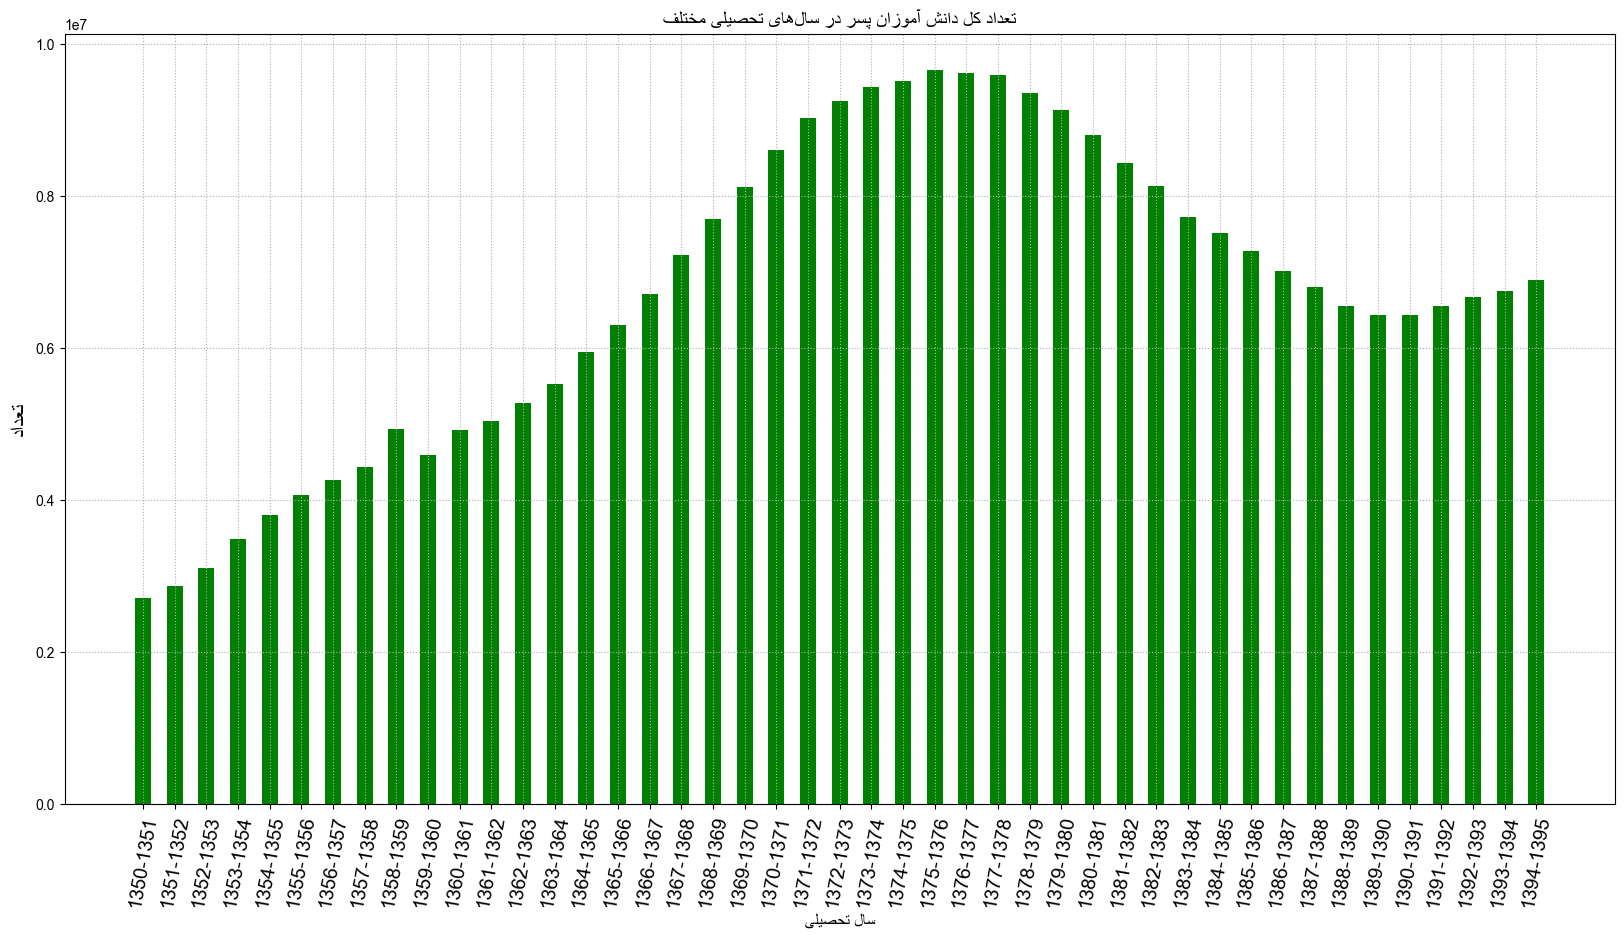

In [15]:
plotting('تعداد کل دانش آموزان پسر در سال‌های تحصیلی مختلف',
         'سال تحصیلی',
         'تعداد'
         , df['Msum'], 'bar')     # نمودار تعداد کل دانش‌آموزان پسر در سال‌های تحصیلی مختلف

In [16]:
df.head()

,Msum,Fsum,Mpreschool,Fpreschool,Mprimary,Fprimary,Mjunior_school,Fjunior_school,Mhigh_school,Fhigh_school,preschool / sum,primary / sum,junior_school / sum,high_school / sum,Msum / Fsum,Mprimary / Fprimary,Mjunior / Fjunior,Mhigh / Fhigh
1350-1351,2705357,1567185,11728,9509,1734310,1069331,161754,97464,797565,390881,0.004971,0.656200,0.060671,0.278159,1.726252,1.621865,1.659628,2.040429
1351-1352,2866839,1688263,11748,10025,1825407,1137189,361084,210381,668600,330668,0.004780,0.650391,0.125456,0.219373,1.698100,1.605192,1.716334,2.021968
1352-1353,3103607,1799113,22400,18587,1957533,1180938,576045,330293,547629,269295,0.008360,0.640149,0.184864,0.166627,1.725076,1.657609,1.744042,2.033565
1353-1354,3479299,2074053,42280,40574,2173074,1348350,739710,411746,524235,273383,0.014920,0.634108,0.207344,0.143628,1.677536,1.611654,1.796520,1.917584
1354-1355,3799188,2327935,95446,79978,2321089,1491431,824242,459419,558411,297107,0.028631,0.622237,0.209505,0.139628,1.631999,1.556283,1.794096,1.879495


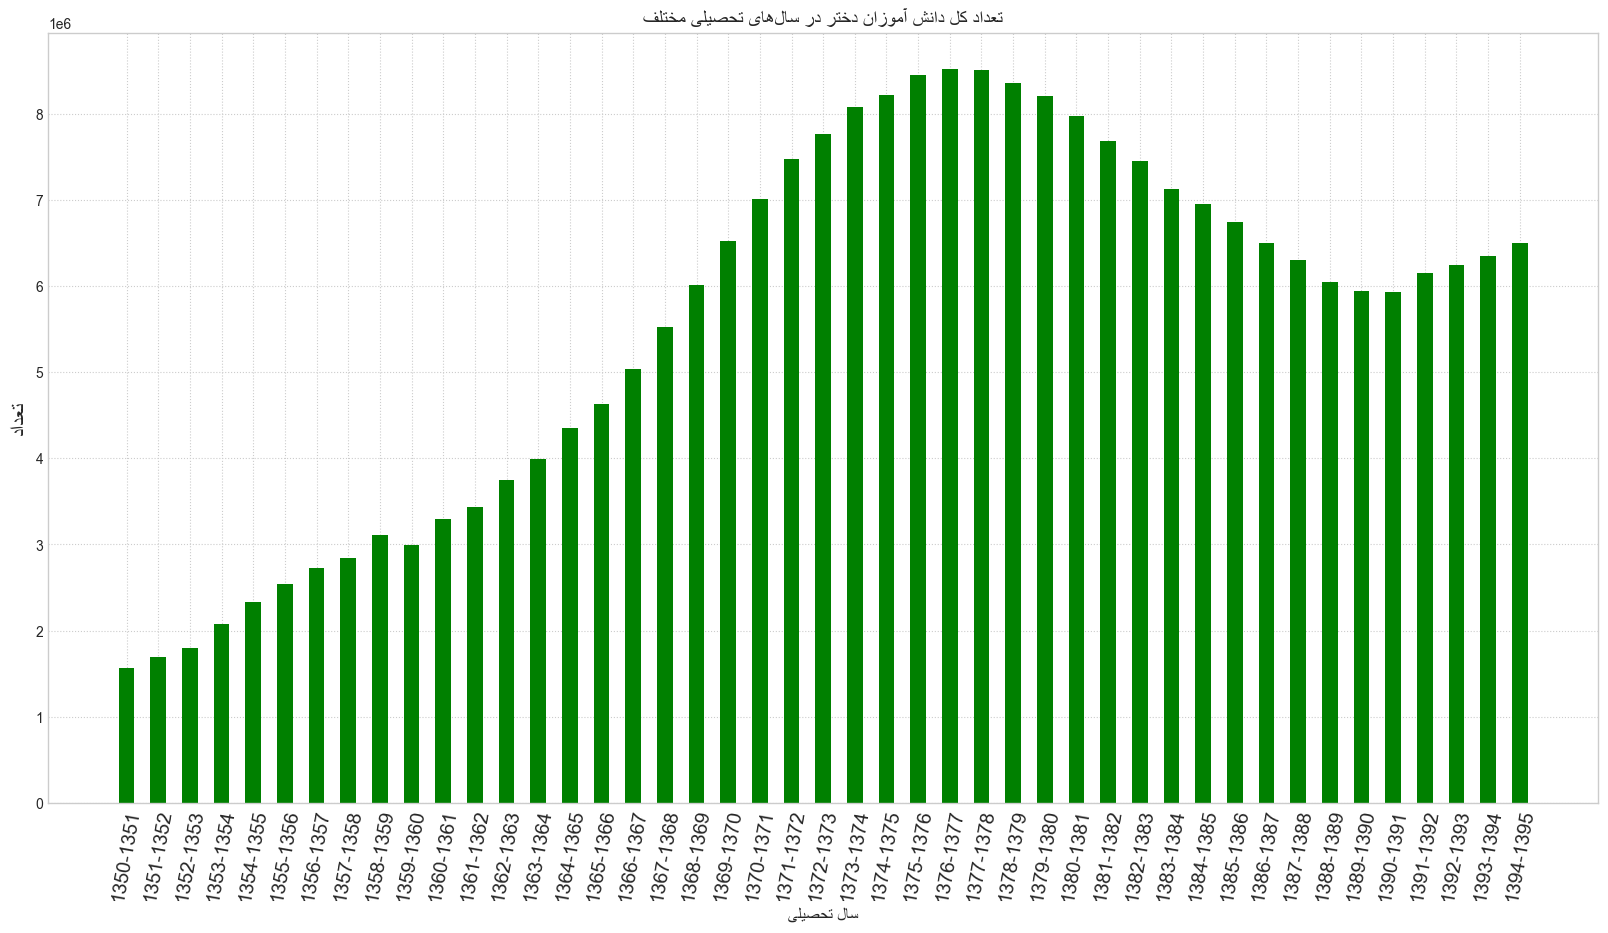

In [17]:
plotting('تعداد کل دانش آموزان دختر در سال‌های تحصیلی مختلف',
         'سال تحصیلی',
         'تعداد'
         , df['Fsum'], 'bar')     # نمودار تعداد کل دانش‌آموزان دختر در سال‌های تحصیلی مختلف

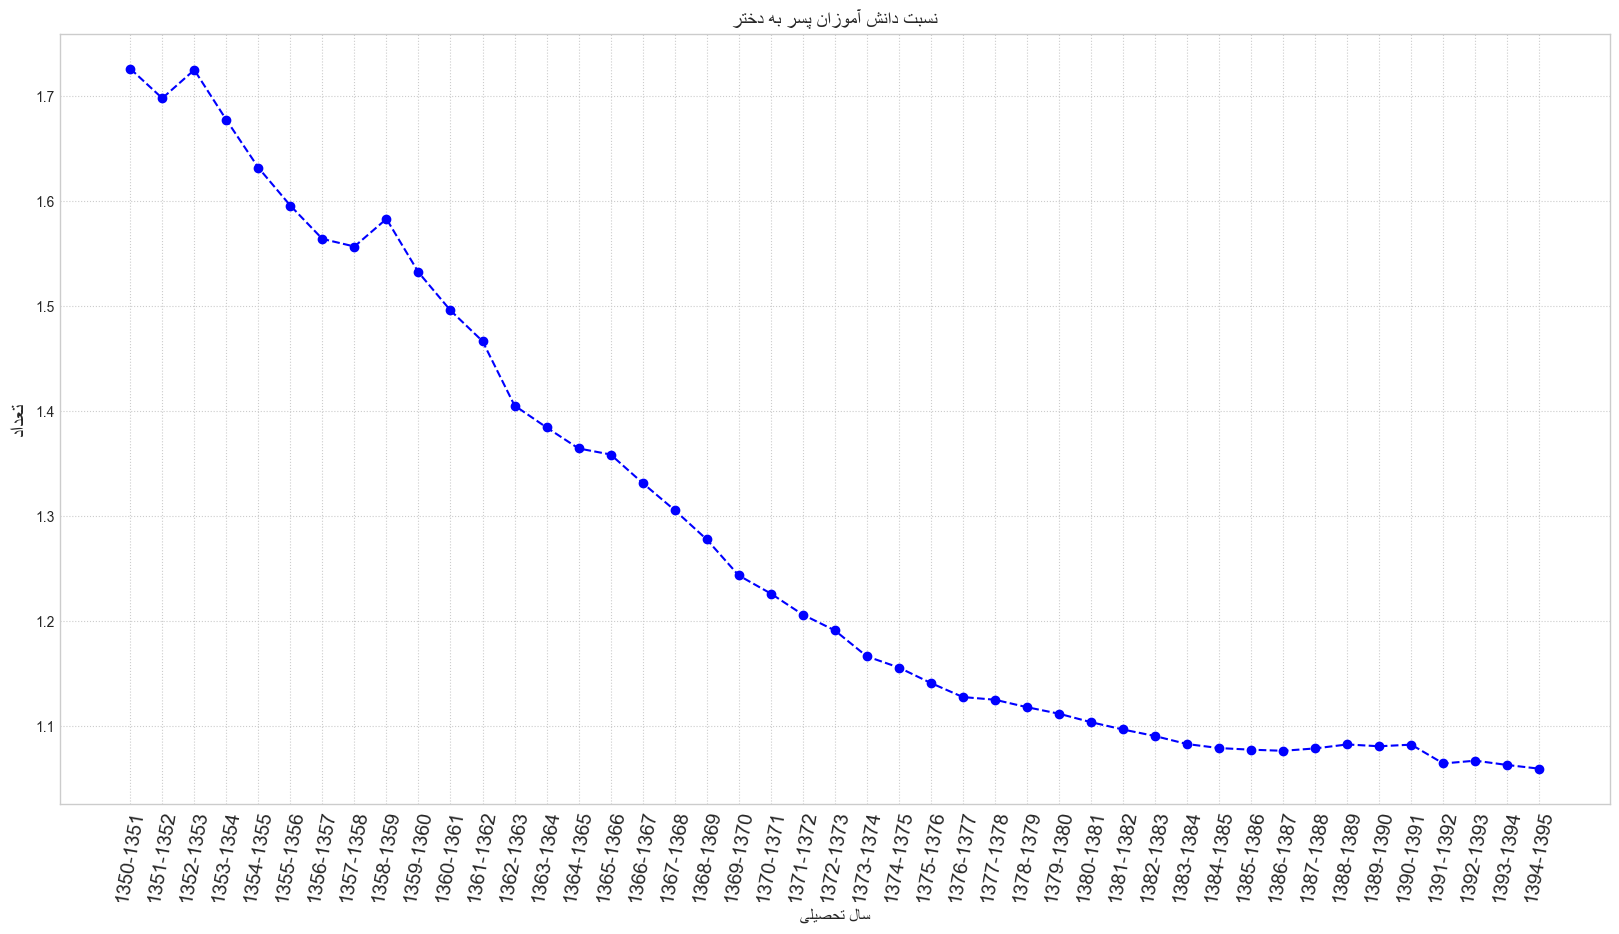

In [18]:
plotting('نسبت دانش آموزان پسر به دختر',
         'سال تحصیلی',
         'تعداد',
         df['Msum / Fsum'], 'plot')            # مقایسه نسبت دانش آموزان پسر به دختر در سال های تحصیلی مختلف

مشاهده می شود که در سال 1350 بیشتر دانش آموزان پسر به تحصیل مشغول بودند اما به تدریج از سال 1352 تعداد دانش آموزان دختر در مدارس افزایش یافته و نسبت پسران به دختران رفته رفته کم می شود اما همچنان تعداد کل دانش آموزان پسر از دانش آموزان دختر بیشر است.

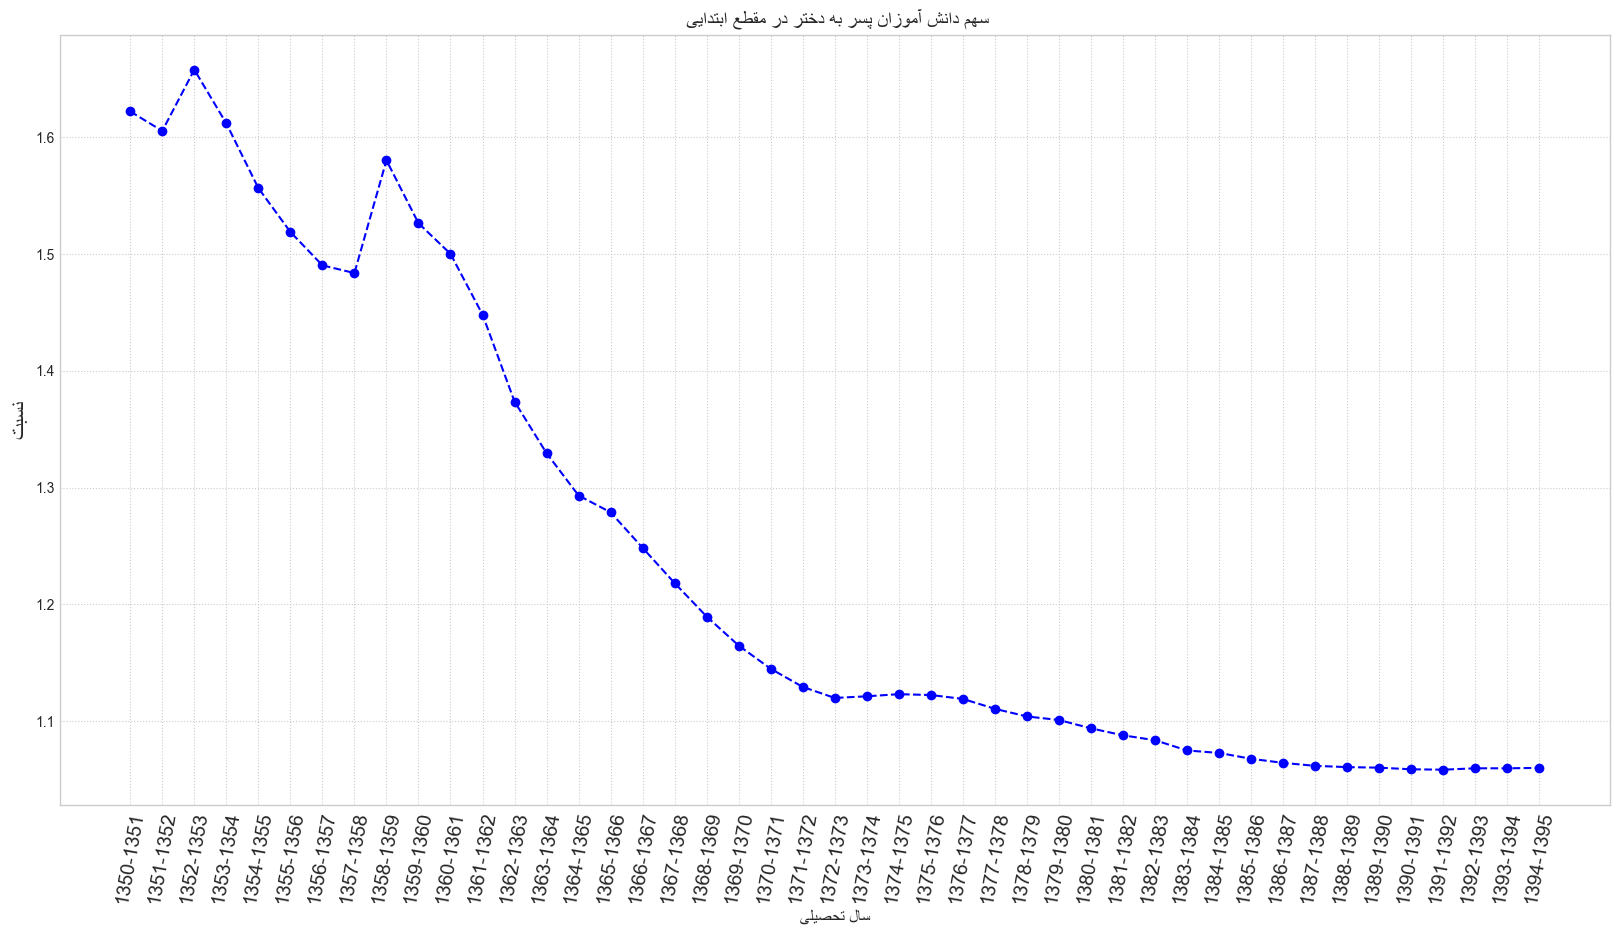

In [19]:
plotting('سهم دانش آموزان پسر به دختر در مقطع ابتدایی ',
         'سال تحصیلی',
         'نسبت',
         df['Mprimary / Fprimary'], 'plot')   # سهم دانش آموزان پسر به دختر در مقطع ابتدایی در سال های تحصیلی گوناگون


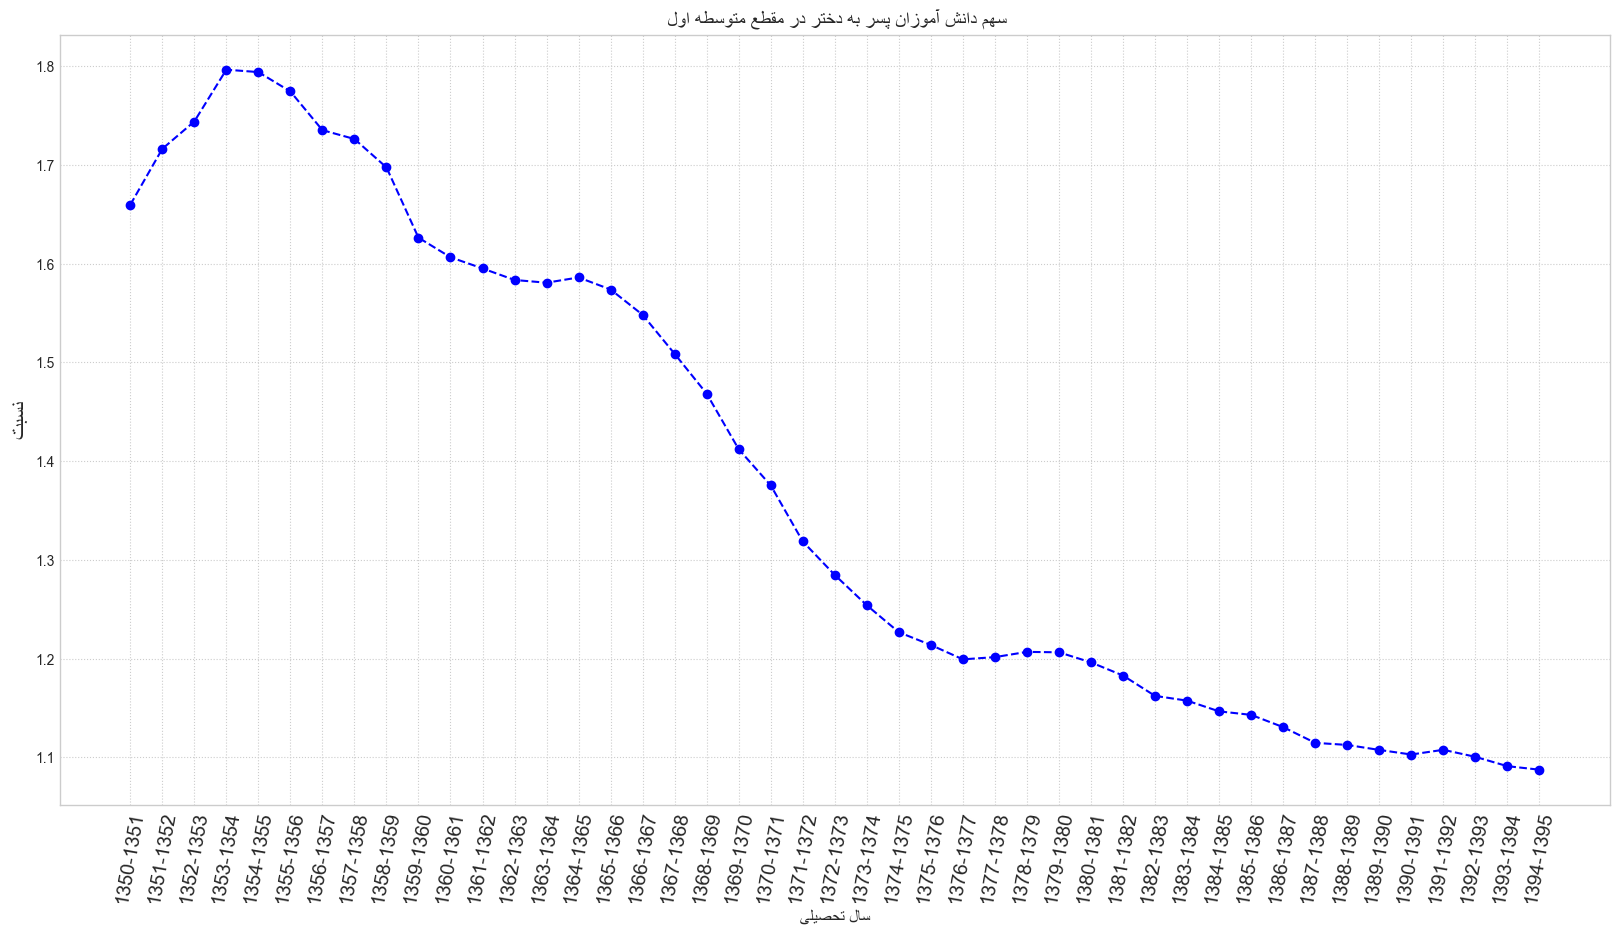

In [20]:
plotting('سهم دانش آموزان پسر به دختر در مقطع متوسطه اول ',
         'سال تحصیلی',
         'نسبت',
         df['Mjunior / Fjunior'], 'plot')   # سهم دانش آموزان پسر به دختر در مقطع متوسطه اول در سال های تحصیلی گوناگون


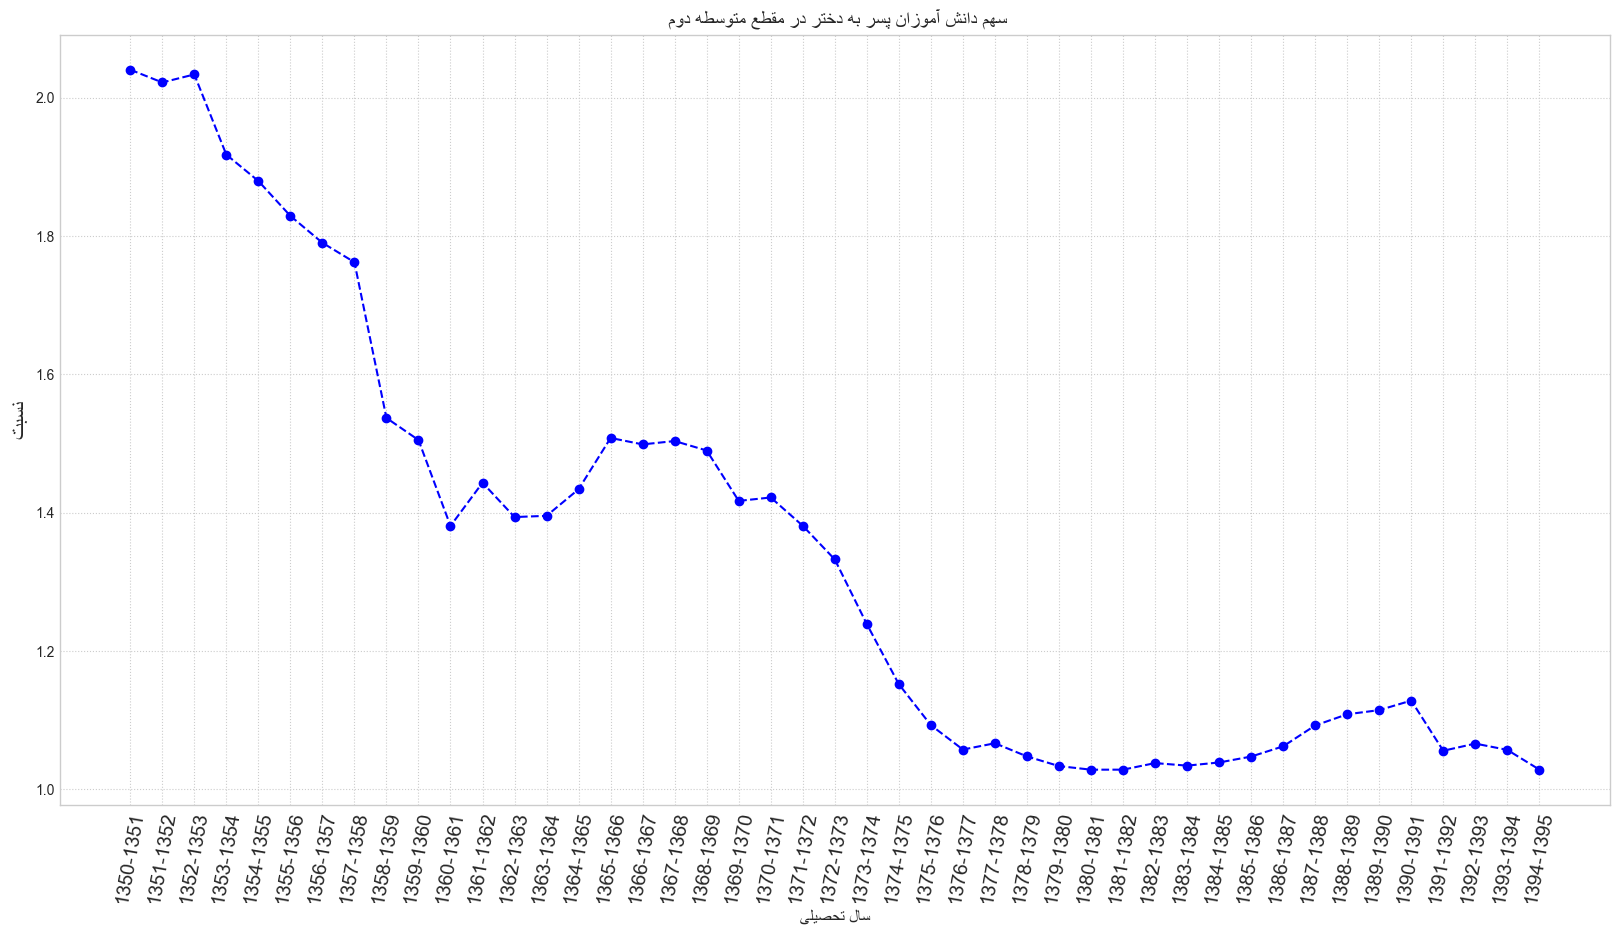

In [21]:
plotting('سهم دانش آموزان پسر به دختر در مقطع متوسطه دوم ',
         'سال تحصیلی',
         'نسبت',
         df['Mhigh / Fhigh'], 'plot')   # سهم دانش آموزان پسر به دختر در مقطع متوسطه دوم در سال های تحصیلی گوناگون


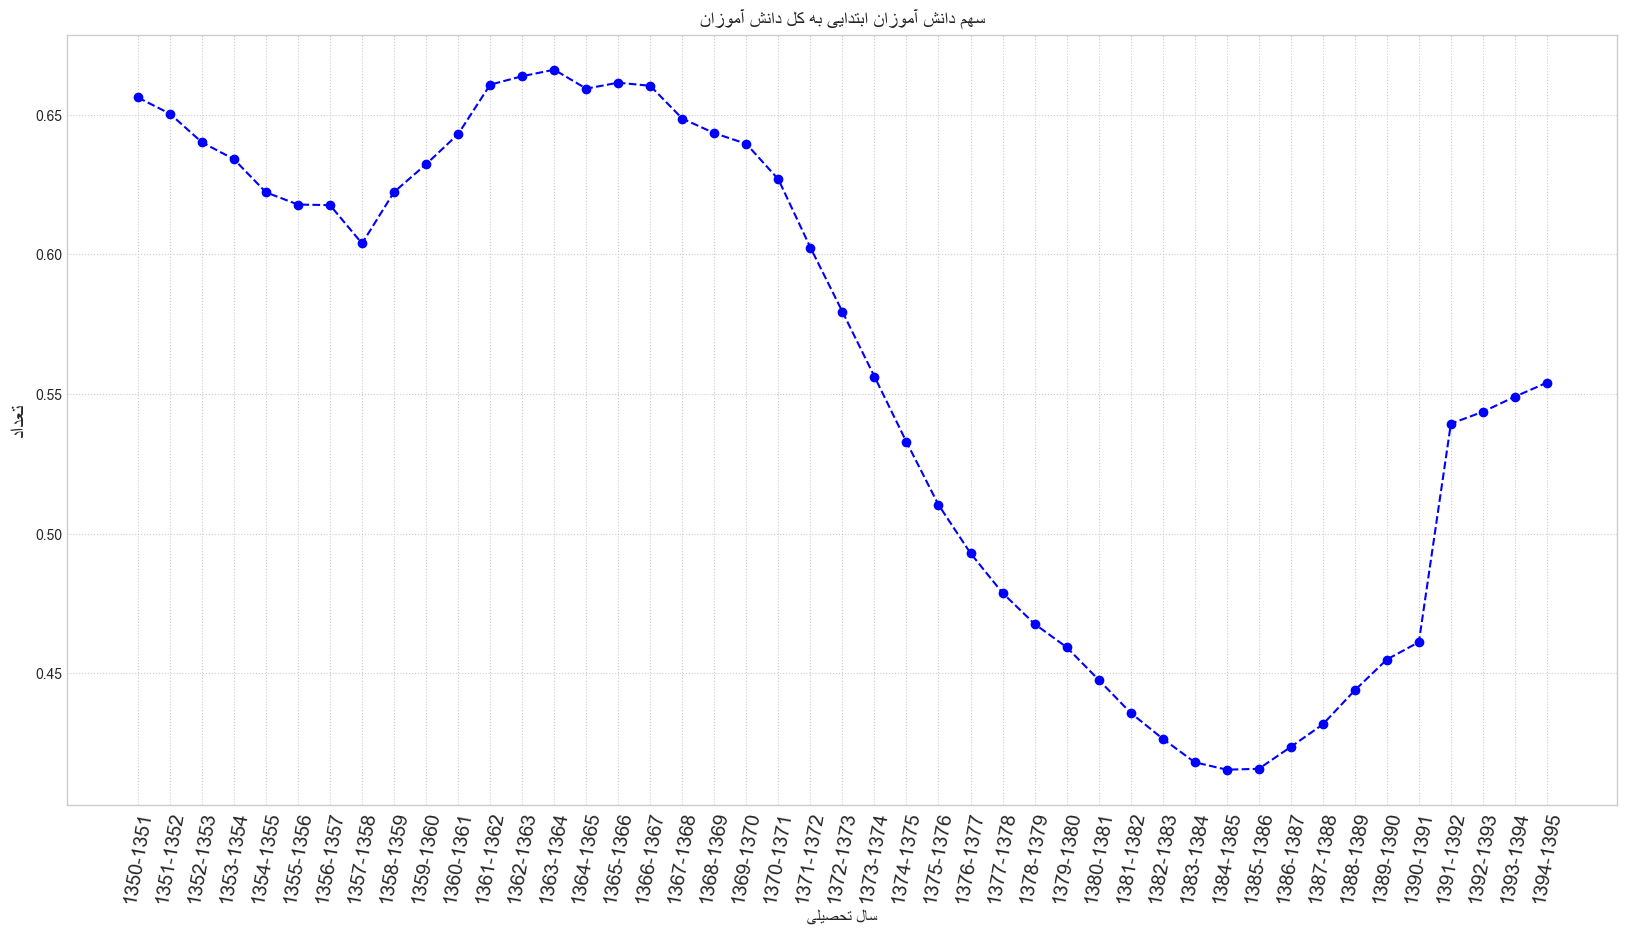

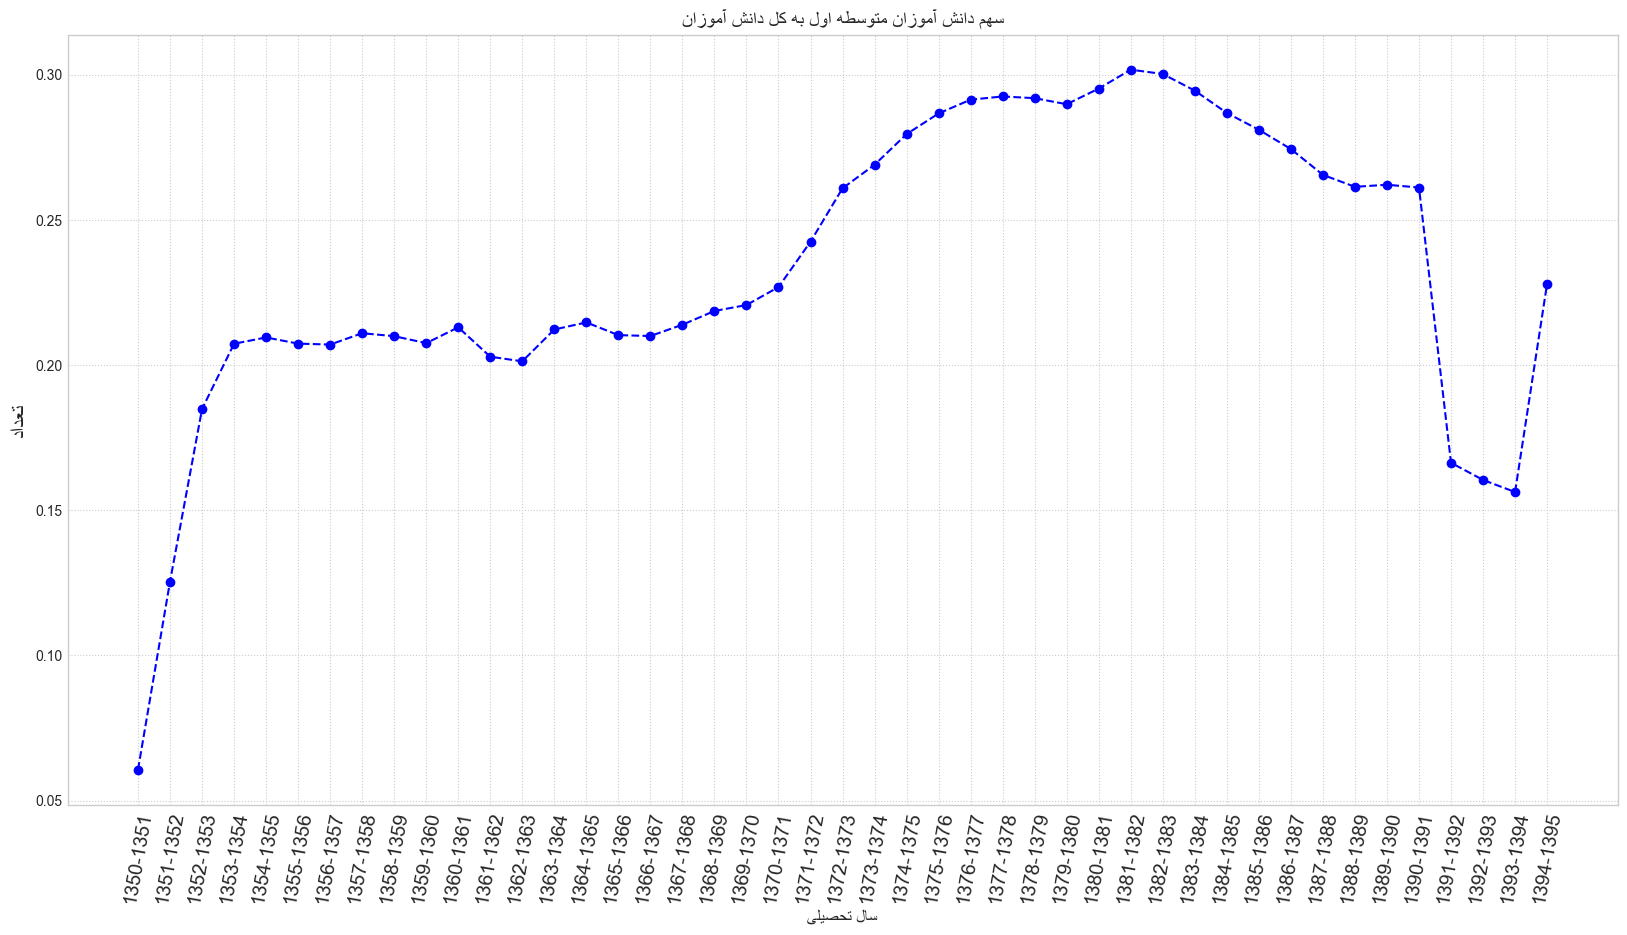

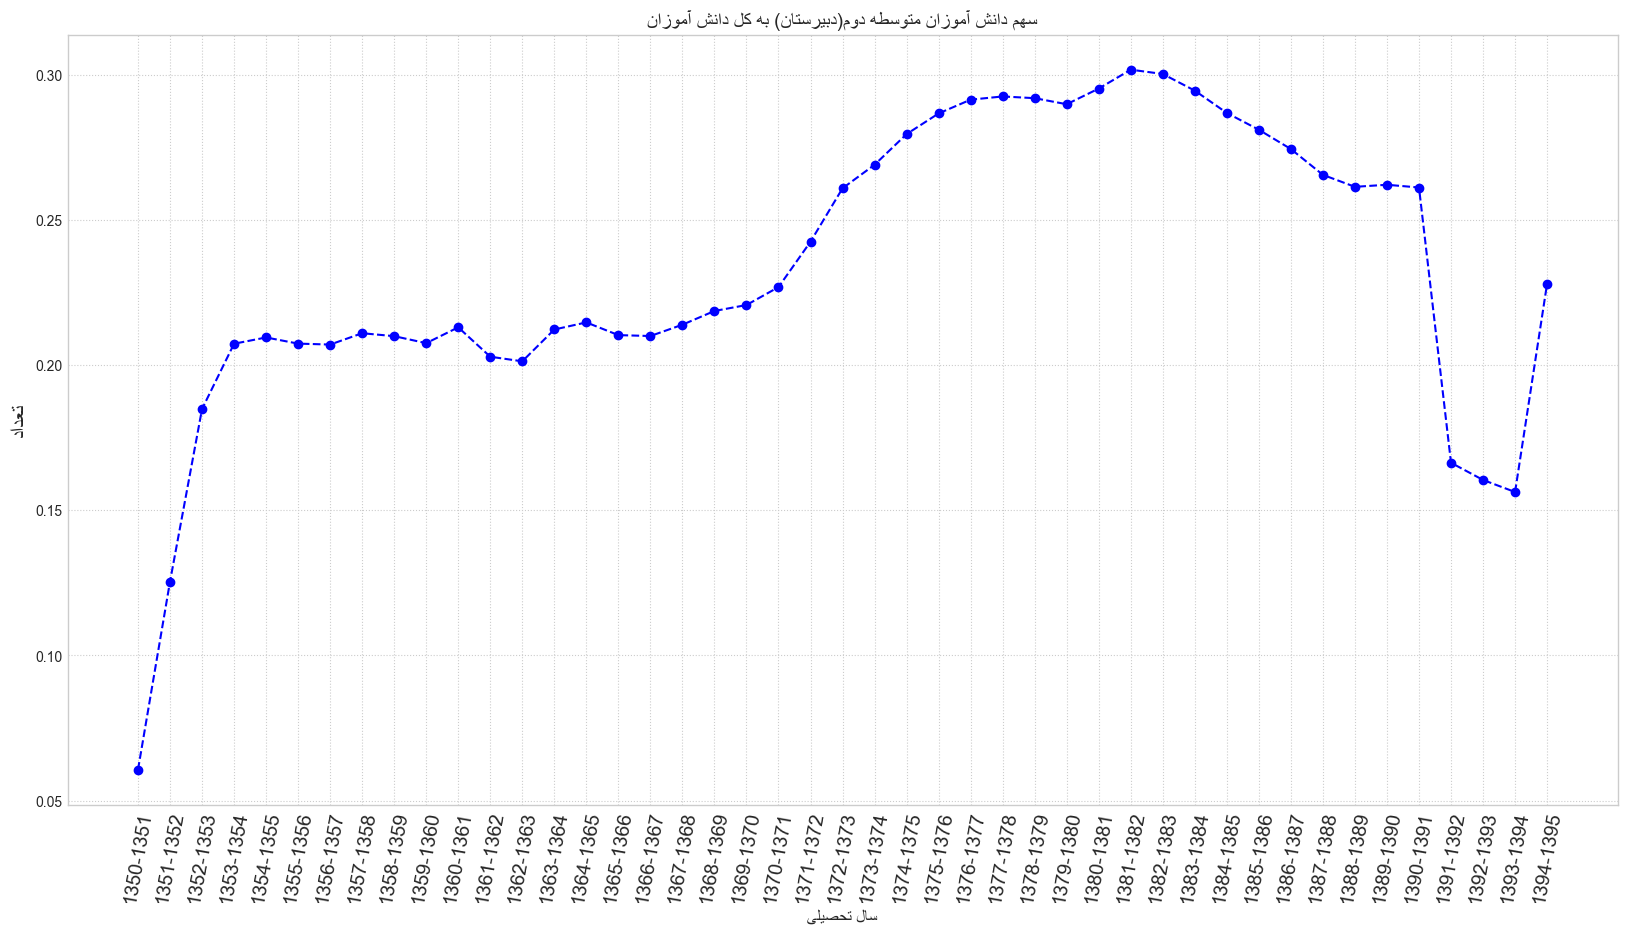

In [22]:
plotting('سهم دانش آموزان ابتدایی به کل دانش آموزان',
         'سال تحصیلی',
         'تعداد',
         df['primary / sum'], 'plot')   # سهم دانش آموزان ابتدایی به کل دانش آموزان در سال های تحصیلی مختلف

plotting('سهم دانش آموزان متوسطه اول به کل دانش آموزان',
         'سال تحصیلی',
         'تعداد',
         df['junior_school / sum'], 'plot')   # سهم دانش آموزان متوسطه اول به کل دانش آموزان در سال های تحصیلی مختلف

plotting('سهم دانش آموزان متوسطه دوم(دبیرستان) به کل دانش آموزان',
         'سال تحصیلی',
         'تعداد',
         df['junior_school / sum'], 'plot')   # سهم دانش آموزان متوسطه دوم به کل دانش آموزان در سال های تحصیلی مختلف

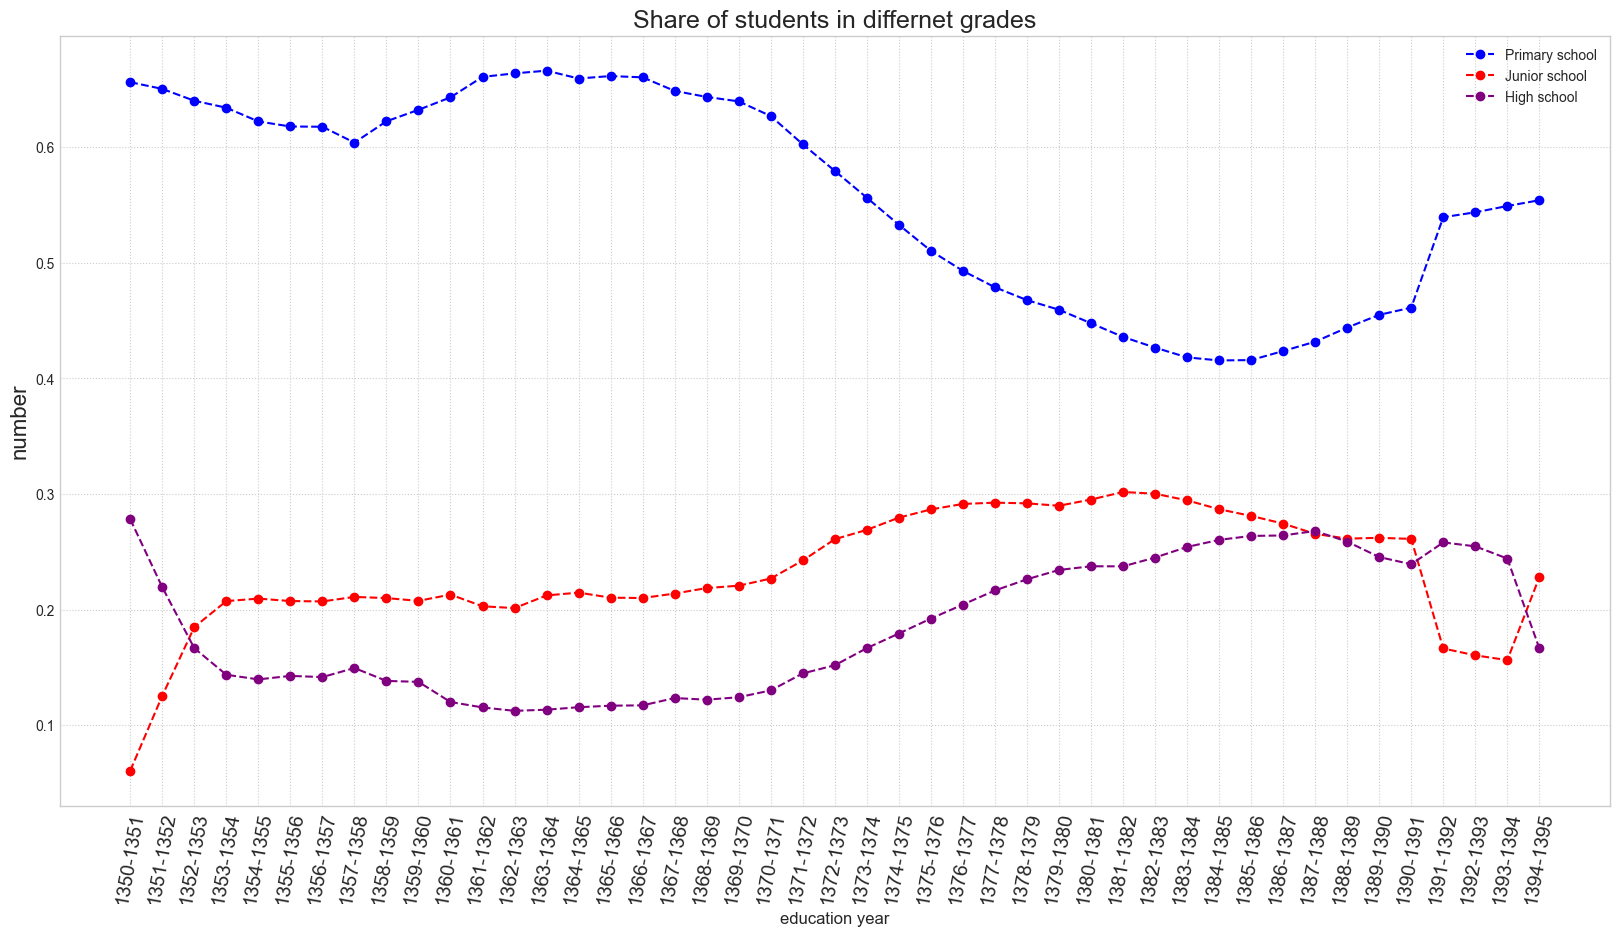

In [23]:
# بررسی سهم دانش آموزان هر یک از مقاطع تحصیلی در طول سال های تحصیلی مختلف

plt.figure(figsize=(20, 10))
plt.title('Share of students in differnet grades', fontsize = 18)
plt.xlabel('education year', fontsize = 12)
plt.ylabel('number', fontsize = 16)
plt.xticks( rotation = 80, fontsize = 14)
plt.grid(True, linestyle = ':')
plt.style.use('seaborn-v0_8-whitegrid')
plt.plot(df['primary / sum'], color = 'blue', linestyle = '--', marker = 'o', label = 'Primary school')
plt.plot(df['junior_school / sum'], color = 'red', linestyle = '--', marker = 'o', label = 'Junior school')
plt.plot(df['high_school / sum'], color = 'purple', linestyle = '--', marker = 'o', label = 'High school')
plt.legend()
plt.show()                                                              

به صورت واضح در نمودار مشخص است که در سال تحصیلی 1391-1392 به دلیل تبدیل نظام 5-3-4 به نظام 6-3-3، تعداد دانش آموزان مدارس متوسطه اول به طور چشمگیری افت می کند و در همان سال تعداد دانش آموزان مدارس ابتدایی بیشتر می شود چون دانش آموزانی که قرار بود از پایه پنجم دبستان به متوسطه اول بروند اکنون باید در پایه ششم دبستان درس می خواندند.